In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [2]:
file = "data/blah_two_spects_210523.h5"

In [3]:
with h5py.File(file, 'r') as h5_file:
    print(h5_file['session012/cal001/ins002/spectrometer1/derived'].keys())
    absorb1 = h5_file['session012/cal001/ins002/spectrometer1/derived/absorbances'][:]
    absorb2 = h5_file['session012/cal001/ins002/spectrometer2/derived/absorbances'][:]

<KeysViewHDF5 ['absorbances']>


In [4]:
output = np.hstack((absorb1, absorb2))

In [5]:
with h5py.File(file, 'r') as h5_file:
    print(h5_file['session014/cal001'].attrs.keys())

<KeysViewHDF5 ['calibration_start_time', 'dark_spectrum', 'dark_spectrum2', 'ftir_amplitude', 'ftir_calibration_cycles', 'ftir_calibration_gain', 'ftir_calibration_measure_mode', 'ftir_cycles', 'ftir_direction', 'ftir_frequency', 'ftir_gain', 'ftir_integrate_mode', 'ftir_measure_mode', 'ftir_temperature', 'ftir_wavenums_count', 'ftir_zero_fill', 'spec1_wavelengths_vector', 'spec2_wavelengths_vector', 'vis_capture_mode', 'vis_cycle_time', 'vis_data_count', 'vis_data_transmit', 'vis_exposure_seconds', 'vis_exposure_time', 'vis_gain_mode', 'vis_sensor_gain_mode', 'white_spectrum', 'white_spectrum2']>


In [6]:
with h5py.File(file, 'r') as h5_file:
    print(h5_file['session014/cal001'].attrs['spec2_wavelengths_vector'][:][666])

2408.328475331688


In [7]:
session = 'session019/cal001'
insertion = 'ins001'
with h5py.File(file, 'r') as h5_file:
    wavelengths_vector1 = h5_file[f'{session}'].attrs['spec1_wavelengths_vector'][:]
    wavelengths_vector2 = h5_file[f'{session}'].attrs['spec2_wavelengths_vector'][:]
    absorbances1 = h5_file[f'{session}/{insertion}/spectrometer1/derived/absorbances'][:]
    absorbances2 = h5_file[f'{session}/{insertion}/spectrometer2/derived/absorbances'][:]
    depths = h5_file[f'{session}/{insertion}/spectrometer1/spectrum_depths'][:]

In [8]:
with h5py.File(file, 'r') as h5_file:
    print(h5_file['session019/cal001/ins001/spectrometer1'].keys())

<KeysViewHDF5 ['derived', 'spectra', 'spectrum_depths', 'spectrum_forces', 'timestamps']>


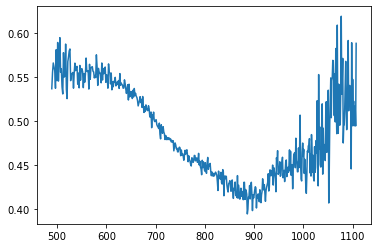

In [9]:
plt.plot(wavelengths_vector1, absorbances1[0, :])

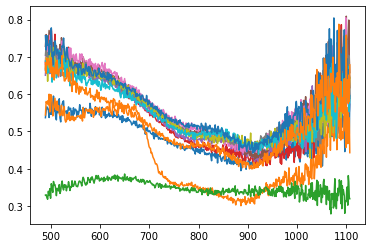

In [10]:
fig, ax = plt.subplots()
for i in range(absorbances1.shape[0]):
    ax.plot(wavelengths_vector1, absorbances1[i, :])
plt.show()
plt.close()



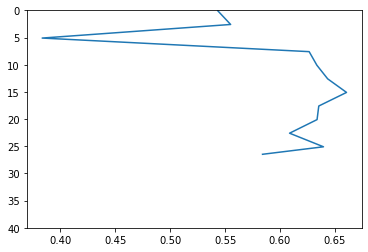

In [11]:
fig, ax = plt.subplots()
ax.set_ylim(40, 0)
ax.plot(absorbances1[:, 100], depths)

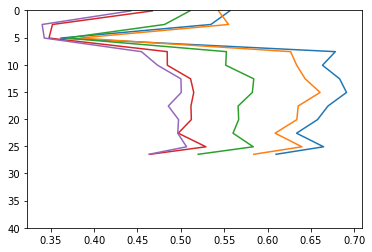

In [12]:
fig, ax = plt.subplots()
ax.set_ylim(40, 0)
for i in range(1, 6):
    ax.plot(absorbances1[:, i * 50], depths)
plt.show()
plt.close()

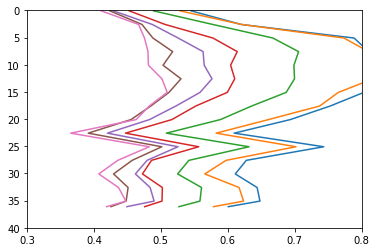

In [13]:
session = 'session019/cal001'
insertion = 'ins005'
with h5py.File(file, 'r') as h5_file:
    wavelengths_vector1 = h5_file[f'{session}'].attrs['spec1_wavelengths_vector'][:]
    wavelengths_vector2 = h5_file[f'{session}'].attrs['spec2_wavelengths_vector'][:]
    absorbances1 = h5_file[f'{session}/{insertion}/spectrometer1/derived/absorbances'][:]
    absorbances2 = h5_file[f'{session}/{insertion}/spectrometer2/derived/absorbances'][:]
    depths = h5_file[f'{session}/{insertion}/spectrometer1/spectrum_depths'][:]

fig, ax = plt.subplots()
ax.set_ylim(40, 0)
ax.set_xlim(0.3, 0.8)
for i in range(1, 8):
    ax.plot(absorbances1[:, i * 50], depths)
plt.show()
plt.close()